In [50]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
#unzip the training dataset
!unzip -q '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/horse-or-human.zip'
validation_dataset = '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/validation-horse-or-human.zip (Unzipped Files)'

replace horses/horse01-0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [52]:
import os
import random
import numpy as np
from io import BytesIO

# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import shutil

# Interactive widgets
from ipywidgets import widgets

In [54]:
original_horses_dir = '/content/horses'
original_humans_dir = '/content/humans'
new_base_train_dir = 'horses_and_humans'

os.makedirs(new_base_train_dir, exist_ok=True)

# copied to new training directory
shutil.copytree(original_horses_dir, os.path.join(new_base_train_dir, 'horses'), dirs_exist_ok=True)
shutil.copytree(original_humans_dir, os.path.join(new_base_train_dir, 'humans'), dirs_exist_ok=True)

'horses_and_humans/humans'

In [55]:
train_dir = os.listdir(new_base_train_dir)
print(f'training subdirectories are: {train_dir}')

validation_dir = os.listdir(validation_dataset)
print(f'validation subdirectories are: {validation_dir}')

training subdirectories are: ['horses', 'humans']
validation subdirectories are: ['horses', 'humans']


In [56]:
# Directory with training horse pictures
train_horse_dir = '/content/horses_and_humans/horses'
# Directory with training human pictures
train_human_dir = '/content/horses_and_humans/humans'

# Directory with validation horse pictures
validation_horse_dir = '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/validation-horse-or-human.zip (Unzipped Files)/horses'
# Directory with validation human pictures
validation_human_dir = '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/validation-horse-or-human.zip (Unzipped Files)/humans'

In [57]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse01-2.png', 'horse46-1.png', 'horse16-2.png', 'horse38-6.png', 'horse34-7.png', 'horse40-7.png', 'horse34-3.png', 'horse32-3.png', 'horse39-0.png', 'horse32-6.png']
TRAIN SET HUMANS: ['human06-05.png', 'human13-22.png', 'human01-02.png', 'human04-29.png', 'human11-14.png', 'human03-08.png', 'human15-11.png', 'human03-17.png', 'human13-28.png', 'human03-15.png']
VAL SET HORSES: ['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
VAL SET HUMANS: ['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [58]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


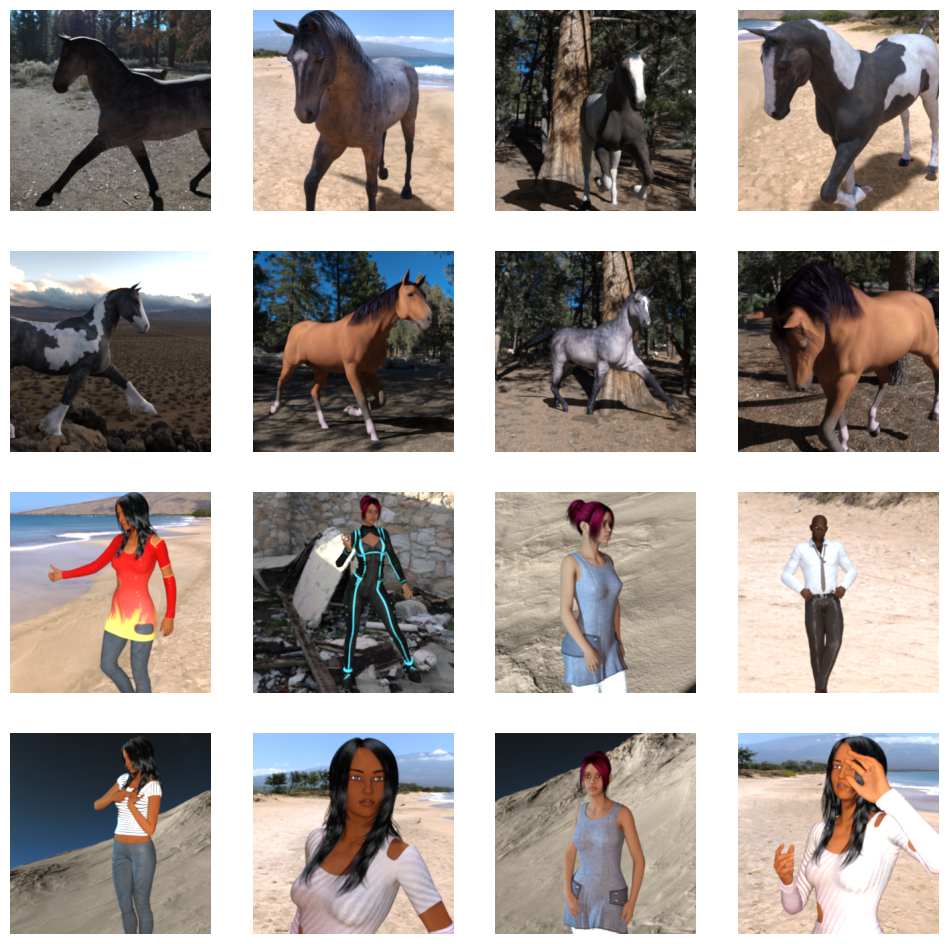

In [59]:
# Parameters for your graph; you will output images in a 4x4 configuration

nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in random.sample(train_horse_names, k=8)]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in random.sample(train_human_names, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [60]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2)
])

In [74]:
model = tf.keras.models.Sequential([

    tf.keras.Input(shape=(150,150,3)),
    data_augmentation,
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    # Only 1 output neuron. It will contain a value from 0 to 1 where 0 is for 'horses' and 1 for 'humans'
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [75]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 146, 146, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 73, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 73, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 69, 69, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 34, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 34, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 30, 30, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 11, 11, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 988,001 (3.77 MB)

 Trainable params: 988,001 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [77]:
# Instantiate the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    new_base_train_dir,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'
    )

# Instantiate the validation set
validation_dataset_path = '/content/drive/MyDrive/Tensorflow Course 1/Horses and Humans/validation-horse-or-human.zip (Unzipped Files)'
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dataset_path,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'
    )

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [78]:
# Define the rescaling and data augmentation layers
rescale_layer = tf.keras.layers.Rescaling(1./255)
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2)
])

# Apply data augmentation and rescale to the training dataset
train_dataset_scaled = train_dataset.map(lambda image, label: (data_augmentation(rescale_layer(image)), label))

# Rescale the validation dataset
validation_dataset_scaled = validation_dataset.map(lambda image, label: (rescale_layer(image), label))

In [79]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                      )

# Configure the validation dataset
validation_dataset_final = (validation_dataset_scaled
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

In [80]:
history = model.fit(
      train_dataset_final,
      epochs=15,
      validation_data = validation_dataset_final,
      verbose=2)

Epoch 1/15
65/65 - 65s - 996ms/step - accuracy: 0.5404 - loss: 0.6867 - val_accuracy: 0.5156 - val_loss: 0.6765
Epoch 2/15
65/65 - 51s - 784ms/step - accuracy: 0.6329 - loss: 0.6453 - val_accuracy: 0.5156 - val_loss: 0.6771
Epoch 3/15
65/65 - 82s - 1s/step - accuracy: 0.7098 - loss: 0.5846 - val_accuracy: 0.5000 - val_loss: 0.8053
Epoch 4/15
65/65 - 52s - 805ms/step - accuracy: 0.7449 - loss: 0.5401 - val_accuracy: 0.5273 - val_loss: 0.7613
Epoch 5/15
65/65 - 50s - 762ms/step - accuracy: 0.7799 - loss: 0.4967 - val_accuracy: 0.5859 - val_loss: 0.6857
Epoch 6/15
65/65 - 82s - 1s/step - accuracy: 0.8053 - loss: 0.4664 - val_accuracy: 0.6680 - val_loss: 0.7658
Epoch 7/15
65/65 - 49s - 758ms/step - accuracy: 0.8247 - loss: 0.4422 - val_accuracy: 0.6367 - val_loss: 0.8462
Epoch 8/15
65/65 - 53s - 818ms/step - accuracy: 0.8150 - loss: 0.4272 - val_accuracy: 0.7227 - val_loss: 0.6992
Epoch 9/15
65/65 - 50s - 763ms/step - accuracy: 0.8228 - loss: 0.4063 - val_accuracy: 0.6953 - val_loss: 0.743

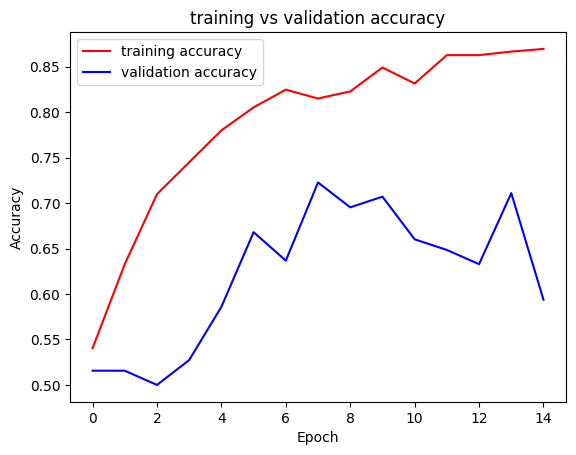

In [81]:
plt.plot(history.history['accuracy'], color='red', label='training accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='validation accuracy')
plt.title('training vs validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [84]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0][0]

    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)

    # In newer ipywidgets versions, change.new contains a dictionary where keys are filenames
    # and values are dictionaries containing 'metadata' and 'content'.
    # The 'content' is already a bytes object.
    for filename, file_info in change.new.items():
        file_content = file_info['content']
        file_jpgdata = BytesIO(file_content)
        file_predict(filename, file_jpgdata, out)


# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_91']
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)
/tmp/ipython-input-86-3033688010.py:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
/tmp/ipython-input-86-3033688010.py:44: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


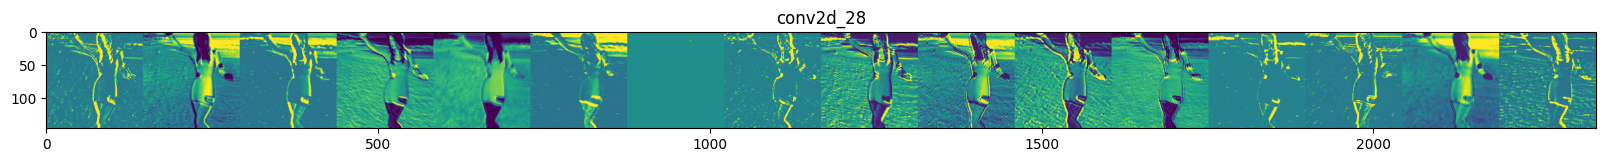

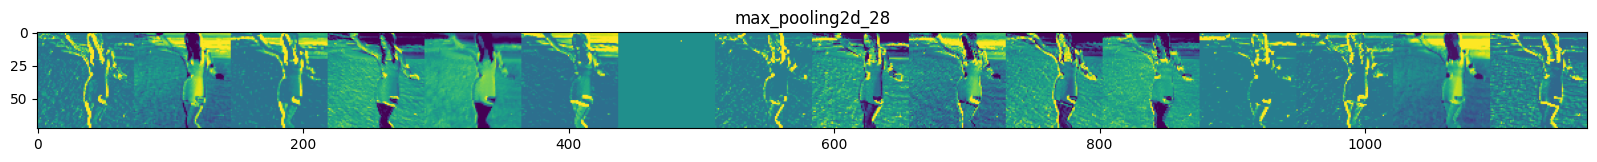

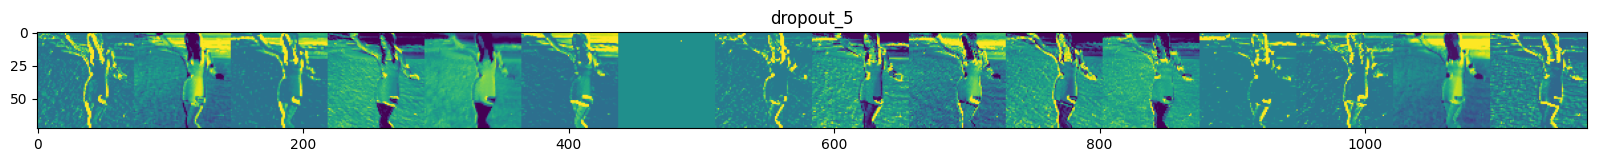

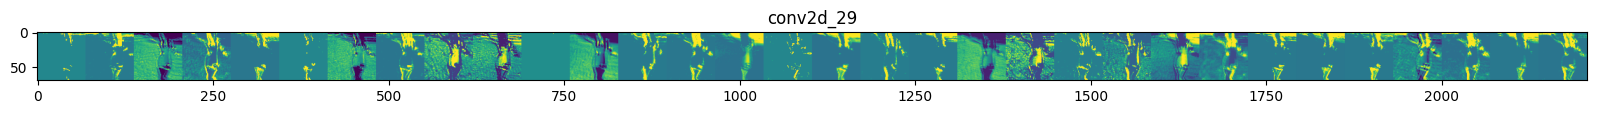

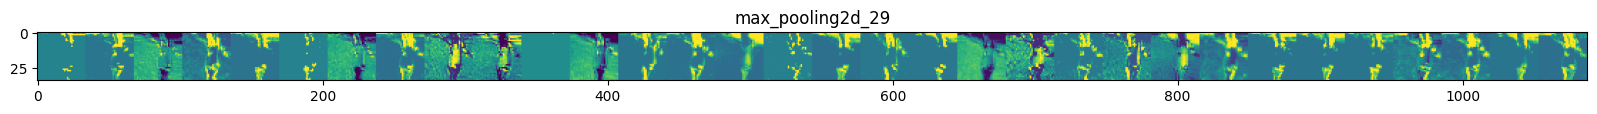

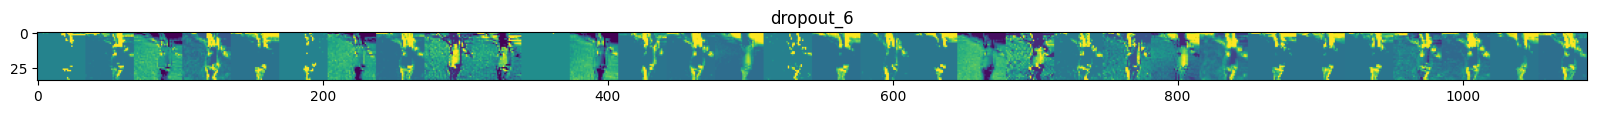

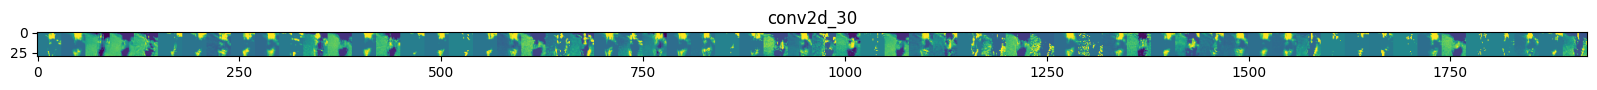

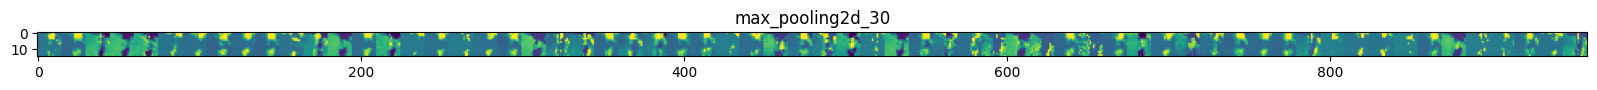

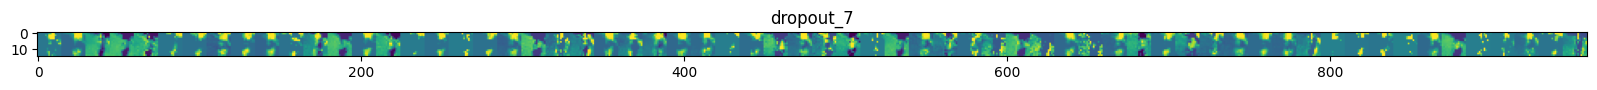

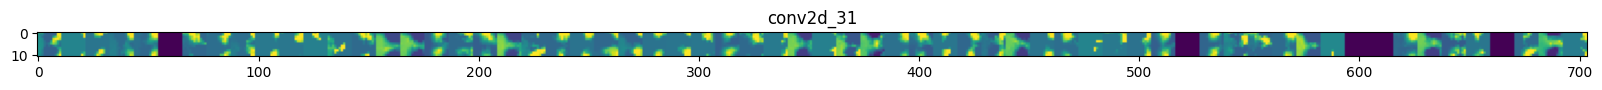

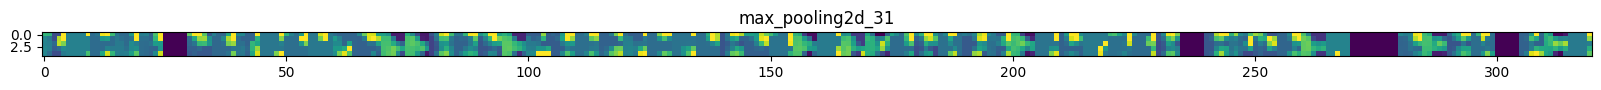

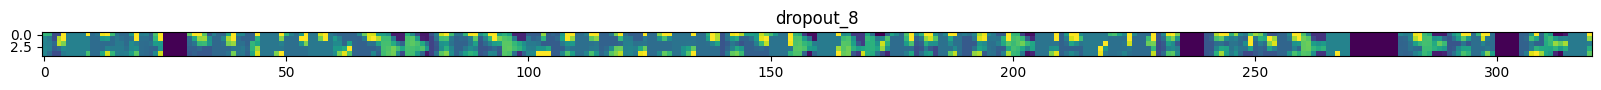

In [86]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = tf.keras.utils.img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x = rescale_layer(x)

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x, verbose=False)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')